In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import torch
from sklearn.preprocessing import MinMaxScaler

In [400]:
linear_data = pd.read_csv('data_linear.csv')

In [401]:
# .iloc <=> Extract Data from DataFrame to Series
# values <=> Convert data from Series to 1D Numpy array
# reshape(-1,1) <=> Convert 1D Numpy Array to 2D numpy array, 1: number of column, -1: number of row (automatic calculate from number of elements)
X_linear = linear_data.iloc[:,0].values.reshape(-1,1)
y_linear = linear_data.iloc[:,1].values.reshape(-1,1)

In [402]:
# Normalize Data
X_linear=MinMaxScaler().fit_transform(X_linear)
y_linear=MinMaxScaler().fit_transform(y_linear)

Text(0, 0.5, 'giá/100')

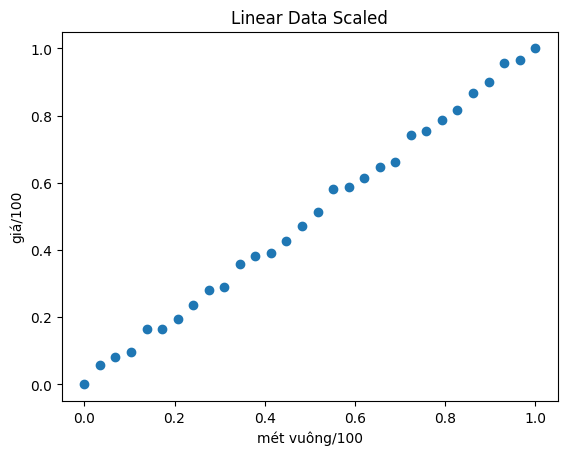

In [403]:
#Visualize Scaled Data
plt.scatter(X_linear, y_linear)
plt.title('Linear Data Scaled')
plt.xlabel('mét vuông/100')
plt.ylabel('giá/100')

In [404]:
#Gợi ý:
#- Viết code tính hàm loss function
#- Viết code tính gradient descent
#- Viết code tính giá trị model dự đoán được
# ....
# Có thể tham khảo tại Assignment HW1 đã làm 

Weights:  [[-4.56322264e-06]
 [ 9.99994415e-01]]


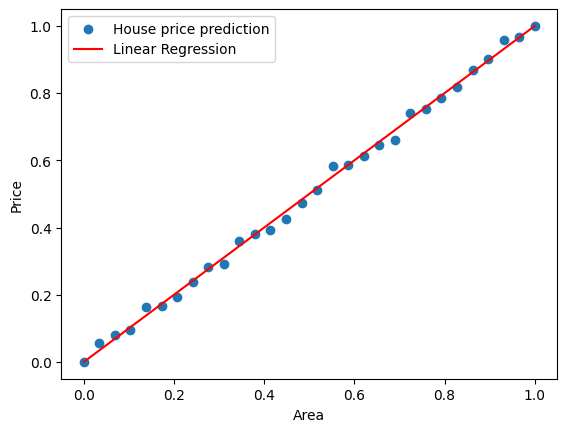

In [405]:
def compute_loss(X,y, w):
    m = len(y)
    h = X.dot(w)
    J = (1/(2*m))* np.sum(np.square(h-y))
    return J
def gradient_descent(X, y, w, lr, iters, tol = 1e-5):
    m = len(y)
    cost_history = np.zeros(iters)

    for i in range(iters):
        h = X.dot(w)
        gradient = (1/m)*X.T.dot(h-y)
        w = w - lr*gradient
        cost_history[i] = compute_loss(X,y,w)

        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tol:
            break
    return w, cost_history

X_linear = np.c_[np.ones(X_linear.shape[0]),X_linear]
w = np.array([0.,1.]).reshape(-1,1)

lr = 0.01
iters = 1000
w,cost_history = gradient_descent(X_linear,y_linear,w,lr,iters)

print("Weights: ",w)

def predict(X, w):
    return X.dot(w)

plt.scatter(X_linear[:,1], y_linear, label = 'House price prediction')
plt.plot(X_linear[:,1], predict(X_linear,w), color = 'red', label = 'Linear Regression')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()
